In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris

In [2]:
iris_data = load_iris()

In [3]:
print("Keys of the iris dataset: \n{}".format(iris_data.keys()))

Keys of the iris dataset: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [4]:
print(iris_data['target_names'])

['setosa' 'versicolor' 'virginica']


In [5]:
df =(iris_data['data'][:5])
df

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_data['data'],iris_data['target'], random_state=0)

In [7]:
print(y_test.shape)

(38,)


In [8]:
import seaborn as sns

In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [10]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [11]:
y_pred = knn.predict(X_test)

In [12]:
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [13]:
np.mean(y_test==y_pred)

0.9736842105263158

In [14]:
knn.score(X_test,y_test)

0.9736842105263158

In [15]:
from sklearn.metrics  import accuracy_score
from sklearn.model_selection import cross_val_score

In [16]:
accuracy_score(y_test,y_pred)

0.9736842105263158

In [17]:
np.mean(cross_val_score(KNeighborsClassifier(),iris_data['data'],iris_data['target'],cv=10,scoring='accuracy'))

0.9666666666666668

In [18]:
x_new = np.array([[5,2.9,1,0.2]])
x_new.shape

(1, 4)

In [19]:
pred = knn.predict(x_new)

In [20]:
pred

array([0])

In [21]:
iris_data['target_names'][pred][0]

'setosa'

In [22]:
def find_species(sepal_length,sepal_width,petal_length,petal_width):
    
    x_new = np.array([[sepal_length,sepal_width,petal_length,petal_width]])
    
    pred = knn.predict(x_new)
    print(f'predicted target_value is{pred}')
    print(f"predicted target name :{iris_data['target_names'][pred][0]}")

In [23]:
find_species(4,3,5,6)

predicted target_value is[2]
predicted target name :virginica


In [24]:
iris_data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [25]:
X_train.shape

(112, 4)

In [26]:
X_test.shape

(38, 4)

In [27]:
iris = pd.DataFrame(iris_data['data'],columns=iris_data.feature_names)

In [28]:
iris['target_value'] = iris_data['target']

In [29]:
iris.sample(6)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_value
92,5.8,2.6,4.0,1.2,1
112,6.8,3.0,5.5,2.1,2
28,5.2,3.4,1.4,0.2,0
142,5.8,2.7,5.1,1.9,2
52,6.9,3.1,4.9,1.5,1
146,6.3,2.5,5.0,1.9,2


In [30]:
train = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])
train.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


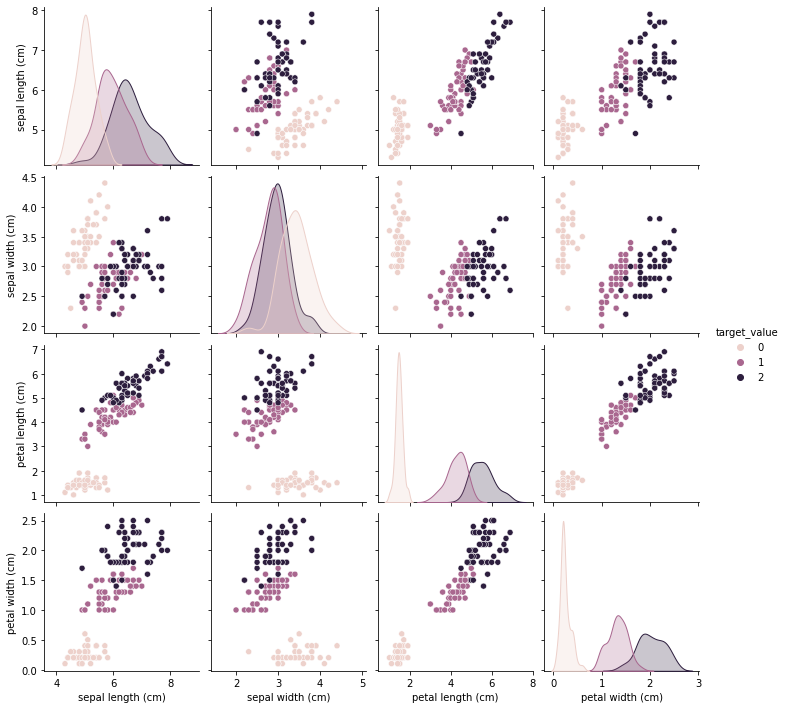

In [31]:
sns.pairplot(iris,hue='target_value')

In [32]:
iris.sample(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_value
56,6.3,3.3,4.7,1.6,1
65,6.7,3.1,4.4,1.4,1
77,6.7,3.0,5.0,1.7,1


In [33]:
# iris.loc[iris['target_value'] == 0, 'target_value'] = 'setosa'
# iris.loc[iris['target_value'] == 1, 'target_value'] = 'versicolor'
# iris.loc[iris['target_value'] == 2, 'target_value'] = 'virginica'

In [40]:
# replacing the numerical values with the categorical values
iris['target_value'] = np.where(iris['target_value']==0,'setosa',np.where(iris['target_value']==1,'versicolor','virginica'))

In [41]:
iris.sample(6)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_value
52,6.9,3.1,4.9,1.5,versicolor
111,6.4,2.7,5.3,1.9,virginica
32,5.2,4.1,1.5,0.1,setosa
141,6.9,3.1,5.1,2.3,virginica
121,5.6,2.8,4.9,2.0,virginica
5,5.4,3.9,1.7,0.4,setosa


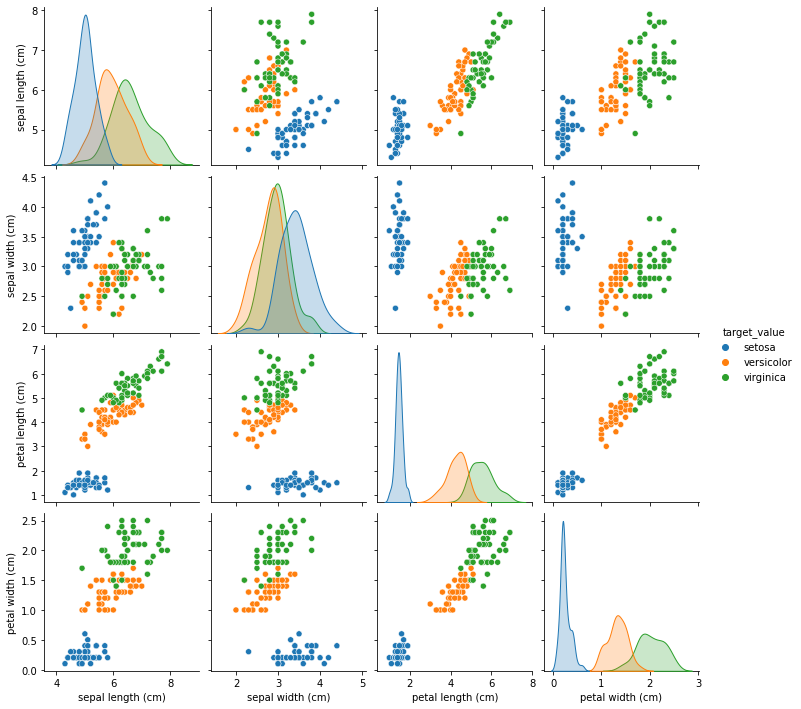

In [43]:
sns.pairplot(iris,hue='target_value')